In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_5/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_5


In [4]:
from datetime import datetime
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
dataset = pd.read_csv('AAPL.csv', index_col= 0)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 2016-11-14 to 2020-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,55.022847,55.634645,54.439440,55.068780,53.661965,1.279139e+08
std,22.808228,23.199504,22.329356,22.778370,23.265842,5.914382e+07
min,26.642500,26.920000,26.020000,26.427500,24.825821,2.880380e+07
25%,39.973123,40.278123,39.636251,39.968751,38.069605,8.788140e+07
50%,47.244999,47.631248,46.872500,47.197500,45.769047,1.118354e+08
75%,61.968749,63.971249,61.203751,62.090624,61.046269,1.499102e+08
max,137.589996,137.979996,130.529999,134.179993,133.948898,4.479400e+08


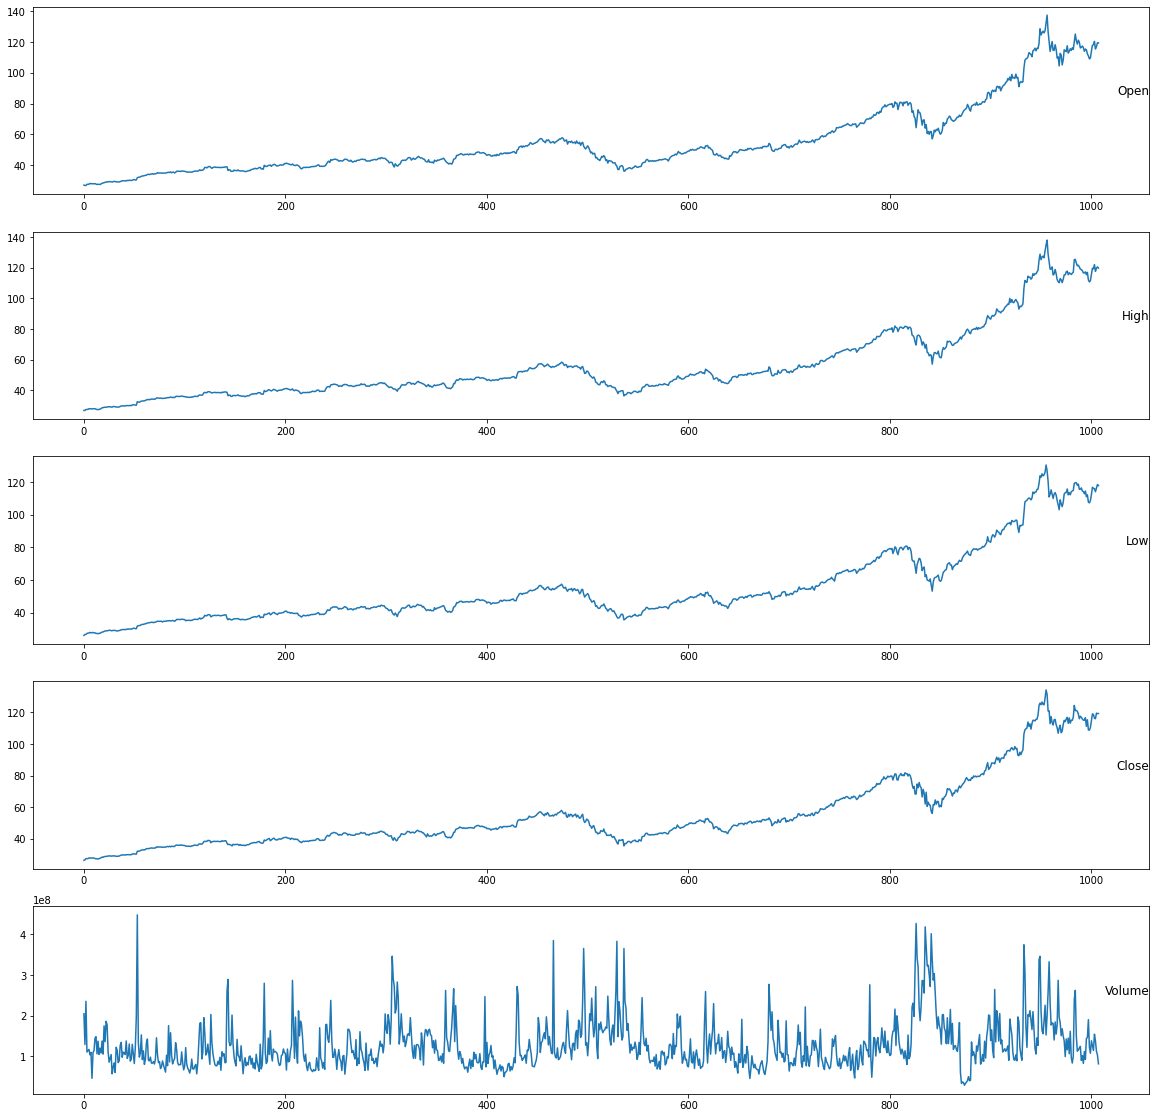

In [8]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5] # vì cột 4 là cột kiểu chuỗi
i = 1
# plot each column
plt.figure(figsize=(20,20))
for group in groups:
  plt.subplot(len(groups), 1, i)
  plt.plot(values[:, group])
  plt.title(dataset.columns[group], y=0.5, loc='right')
  i += 1
plt.show()

In [9]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True) # kết quả sau khi drop gán luôn vào agg
  return agg

In [12]:
# # load dataset
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values)
scaled = scaler.transform(values)
print("Frame as Series:")
print(scaled[:5])
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("Frame as supervised learning:")
print(reframed.head())
# Vì chỉ predict thông tin var1(t), còn từ var2(t) trở đi không dự đoán nên drop
# giữ lại các cột từ 0-6 (6 cột đầu là inputs, cột cuối là output)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9, 10,11]], axis=1, inplace=True)
print("Frame will use:")
print(reframed.head())

Frame as Series:
[[2.5687814e-03 2.9262900e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.1966838e-01]
 [0.0000000e+00 0.0000000e+00 4.9756020e-03 3.2481849e-03 3.0130148e-03
  2.3919241e-01]
 [2.9292703e-04 5.7401359e-03 6.0281307e-03 9.9301785e-03 9.2111528e-03
  4.9281877e-01]
 [7.3007494e-03 6.0102493e-03 1.1362538e-02 9.8373443e-03 9.1250390e-03
  1.9498245e-01]
 [7.0979595e-03 6.4379573e-03 1.3347998e-02 1.0092571e-02 9.3617886e-03
  2.0258759e-01]]
Frame as supervised learning:
   var1(t-1)  var2(t-1)  var3(t-1)  ...   var4(t)   var5(t)   var6(t)
1   0.002569   0.000293   0.000000  ...  0.003248  0.003013  0.239192
2   0.000000   0.000000   0.004976  ...  0.009930  0.009211  0.492819
3   0.000293   0.005740   0.006028  ...  0.009837  0.009125  0.194982
4   0.007301   0.006010   0.011363  ...  0.010093  0.009362  0.202588
5   0.007098   0.006438   0.013348  ...  0.013967  0.012956  0.210563

[5 rows x 12 columns]
Frame will use:
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  v

In [13]:
# split into train and test sets
values = reframed.values
train_size = int(len(values)*0.67)
test_size = len(values) - train_size
train, test = values[0:train_size, :], values[train_size:len(values), :]
# split into input and outputs (các cột đầu, cột cuối)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print("Before reshape:")
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("After reshape:")
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Before reshape:
(674, 6) (674,) (333, 6) (333,)
After reshape:
(674, 1, 6) (674,) (333, 1, 6) (333,)


In [14]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [15]:
# design network
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2]))) # 1 sample has 6 featur
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y,
                    epochs=100,
                    batch_size=72,
                    validation_data=(test_X, test_y),
                    verbose=2
                    )

Epoch 1/100
10/10 - 3s - loss: 0.1248 - val_loss: 0.4011
Epoch 2/100
10/10 - 0s - loss: 0.0852 - val_loss: 0.3194
Epoch 3/100
10/10 - 0s - loss: 0.0489 - val_loss: 0.2346
Epoch 4/100
10/10 - 0s - loss: 0.0332 - val_loss: 0.1693
Epoch 5/100
10/10 - 0s - loss: 0.0337 - val_loss: 0.1601
Epoch 6/100
10/10 - 0s - loss: 0.0297 - val_loss: 0.1697
Epoch 7/100
10/10 - 0s - loss: 0.0270 - val_loss: 0.1486
Epoch 8/100
10/10 - 0s - loss: 0.0240 - val_loss: 0.1177
Epoch 9/100
10/10 - 0s - loss: 0.0211 - val_loss: 0.0966
Epoch 10/100
10/10 - 0s - loss: 0.0178 - val_loss: 0.0690
Epoch 11/100
10/10 - 0s - loss: 0.0142 - val_loss: 0.0391
Epoch 12/100
10/10 - 0s - loss: 0.0105 - val_loss: 0.0166
Epoch 13/100
10/10 - 0s - loss: 0.0069 - val_loss: 0.0330
Epoch 14/100
10/10 - 0s - loss: 0.0045 - val_loss: 0.0563
Epoch 15/100
10/10 - 0s - loss: 0.0038 - val_loss: 0.0643
Epoch 16/100
10/10 - 0s - loss: 0.0036 - val_loss: 0.0615
Epoch 17/100
10/10 - 0s - loss: 0.0035 - val_loss: 0.0553
Epoch 18/100
10/10 - 0s

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


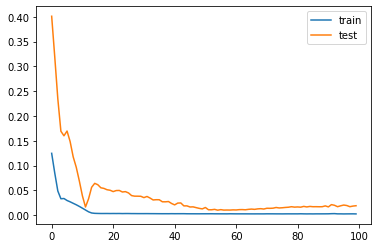

In [17]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
test_X.shape

(333, 1, 6)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(674, 1, 6) (674,) (333, 1, 6) (333,)


In [20]:
def invert_scaling(y, X, s):
# invert scaling for forecast
  inv_y = np.concatenate((y, X[:, 1:]), axis=1)
  print(s, "shape:", inv_y.shape)
  inv_y = scaler.inverse_transform(inv_y)
  print(s, inv_y.shape)
  # trả lại hình dạng ban đầu
  inv_y = inv_y[:,0]
  return inv_y

In [21]:
# make a prediction
yhat = model.predict(test_X)
print("Test_x_shape:", test_X.shape)
test_X_now = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print("Test_x_now_shape:", test_X_now.shape)

Test_x_shape: (333, 1, 6)
Test_x_now_shape: (333, 6)


In [22]:
# # invert scaling for forecast
# inv_yhat = np.concatenate((yhat, test_X_now[:, 1:]), axis=1)
# print("inv_y_hat_shape:", inv_yhat.shape)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# print("inv_yhat:", inv_yhat.shape)
# # trả lại hình dạng ban đầu
# inv_yhat = inv_yhat[:,0]
inv_yhat = invert_scaling(yhat, test_X_now, "inv_yhat")

inv_yhat shape: (333, 6)
inv_yhat (333, 6)


In [23]:
# invert scaling for actual
# inv_y = np.concatenate((test_y, test_X_now[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
test_y = test_y.reshape((len(test_y), 1))
inv_y = invert_scaling(test_y, test_X_now, "inv_y")

inv_y shape: (333, 6)
inv_y (333, 6)


In [24]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test RMSE: 3.318
Test MAE: 2.123


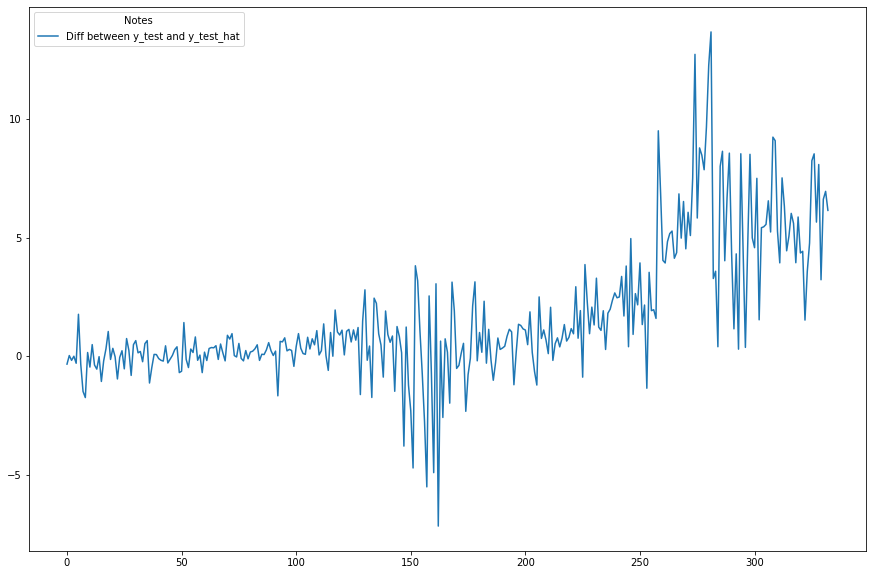

In [25]:
plt.figure(figsize=(15,10))
plt.plot(inv_y - inv_yhat, label='Diff between y_test and y_test_hat')
plt.legend(title="Notes")
plt.show()

In [26]:
# make a prediction of y
y_train_hat = model.predict(train_X)
train_X_now = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# invert scaling for forecast
# inv_y_train_hat = np.concatenate((y_train_hat, train_X_now[:, 1:]), axis=1)
# inv_y_train_hat = scaler.inverse_transform(inv_y_train_hat)
# inv_y_train_hat = inv_y_train_hat[:,0]
inv_y_train_hat = invert_scaling(y_train_hat, train_X_now, "inv_y_train_hat")

inv_y_train_hat shape: (674, 6)
inv_y_train_hat (674, 6)


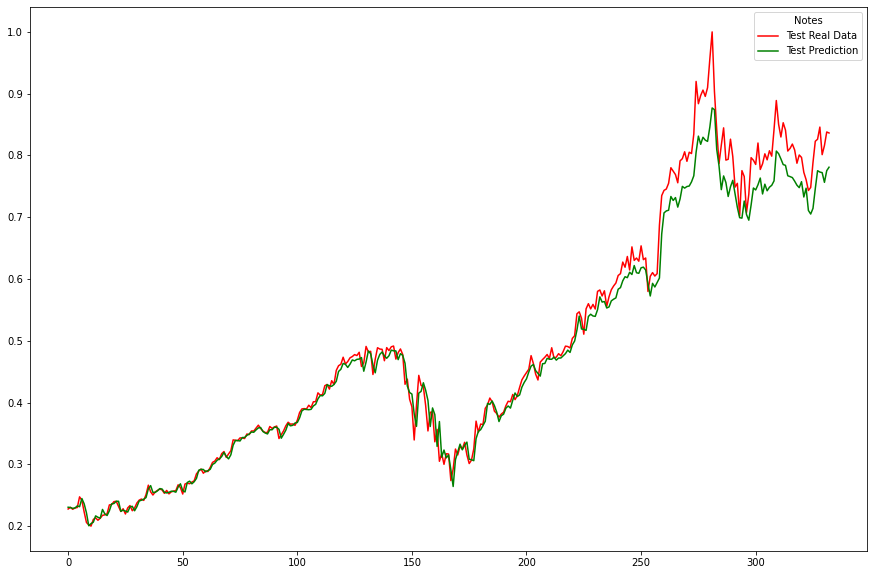

In [27]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(test_y, label='Test Real Data', color='red')
plt.plot(yhat, label='Test Prediction', color='green')
plt.legend(title="Notes")
plt.show()

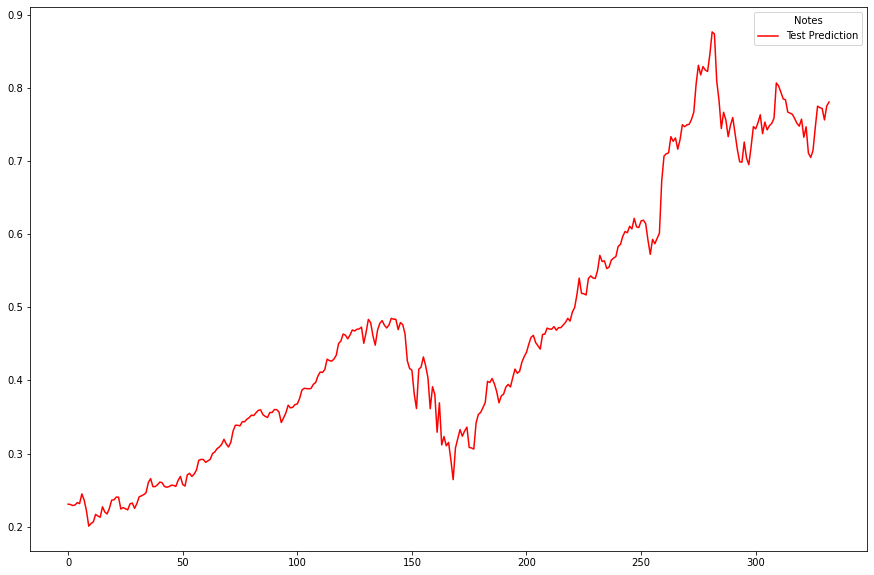

In [28]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(yhat, label='Test Prediction', color='red')
plt.legend(title="Notes")
plt.show()

In [29]:
print('Val_loss train')
model.evaluate(train_X, train_y)

Val_loss train
22/22 [==============================] - 0s 1ms/step - loss: 0.0026


0.0026461398229002953

In [30]:
print('Val_loss test')
model.evaluate(test_X, test_y)

Val_loss test
11/11 [==============================] - 0s 2ms/step - loss: 0.0191


0.01913764327764511

# Make new prediction

In [31]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,120.500000,121.989998,116.050003,116.320000,116.320000,154515300
2020-11-10,115.550003,117.589996,114.129997,115.970001,115.970001,138023400
2020-11-11,117.190002,119.629997,116.440002,119.489998,119.489998,112295000
2020-11-12,119.620003,120.529999,118.570000,119.209999,119.209999,103162300
2020-11-13,119.440002,119.669998,117.870003,119.260002,119.260002,81581900


In [32]:
values_new = np.array([[119.440002, 119.669998,	117.870003,	119.260002,	119.260002,	81581900],
                       [0,0,0,0,0,0]])
values_new

array([[1.19440002e+02, 1.19669998e+02, 1.17870003e+02, 1.19260002e+02,
        1.19260002e+02, 8.15819000e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [33]:
# ensure all data is float
values_new = values_new.astype('float32')
values_new.size

12

In [34]:
scaled_new = scaler.transform(values_new)
print(scaled_new)

[[ 0.8364092   0.8351341   0.8788634   0.86153466  0.8653915   0.12592113]
 [-0.24013612 -0.24239151 -0.24897142 -0.24526115 -0.22750294 -0.06872182]]


In [35]:
# convert dataframe as supervised learning
reframed_new = series_to_supervised(scaled_new, 1, 1)
reframed_new.drop(reframed_new.columns[[7,8,9, 10,11]], axis=1, inplace=True)
print(reframed_new.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.836409   0.835134   0.878863   0.861535   0.865391   0.125921 -0.240136


In [36]:
reframed_new.shape

(1, 7)

In [37]:
values_new = reframed_new.values
# split into input and outputs
new_pre = values_new[:, :-1]
# reshape input to be 3D [samples, timesteps, features]
new_pre = new_pre.reshape((new_pre.shape[0], 1, new_pre.shape[1]))
print(new_pre.shape)

(1, 1, 6)


In [38]:
yhat_new_pre = model.predict(new_pre)
yhat_new_pre

array([[0.77847385]], dtype=float32)

In [39]:
# invert scaling for actual
yhat_new_pre = yhat_new_pre.reshape((len(yhat_new_pre), 1))
new_pre_now = new_pre.reshape((new_pre.shape[0], new_pre.shape[2]))
# yhat_new_pre = np.concatenate((yhat_new_pre, new_pre_now[:, 1:]), axis=1)
# yhat_new_pre = scaler.inverse_transform(yhat_new_pre)
# yhat_new_pre = yhat_new_pre[:,0]
yhat_new_pre = invert_scaling(yhat_new_pre, new_pre_now, "yhat_new_pre")
yhat_new_pre

yhat_new_pre shape: (1, 6)
yhat_new_pre (1, 6)


array([113.01222], dtype=float32)